In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils

data = pd.read_csv('data/categorized_events.csv')

cat_ints = data['category']
# category_to_int = {cat_name: i for i, cat_name in enumerate(set(y))}
category_to_int = {'sleep': 0, 'school': 1, 'passive_relax': 2, 'trojsten': 3, 'food': 4,  'active_relax': 5, np.NaN: 6}
categories = [cat_name for cat_name, i in sorted(category_to_int.items(), key=lambda x: x[1])]
cat_ints = np.array([category_to_int[category] for category in cat_ints])

summaries = data['summary'].as_matrix()
print(summaries.shape)
print(summaries)

(6074,)
['zapis stipendium diplomy na gjh' 'skolske kolo acm'
 'prve 2 kapitoly z algebry' ..., 'spanok' 'spanok' 'spanok']


In [2]:
word_freqs = pd.DataFrame(utils.count_word_frequencies(summaries))
print('Distinct words:', len(word_freqs))

ngram_freqs = pd.DataFrame(utils.count_ngram_frequencies(summaries, 5))
print('Distinct ngram:', len(ngram_freqs))

Distinct words: 4701
Distinct ngram: 28825


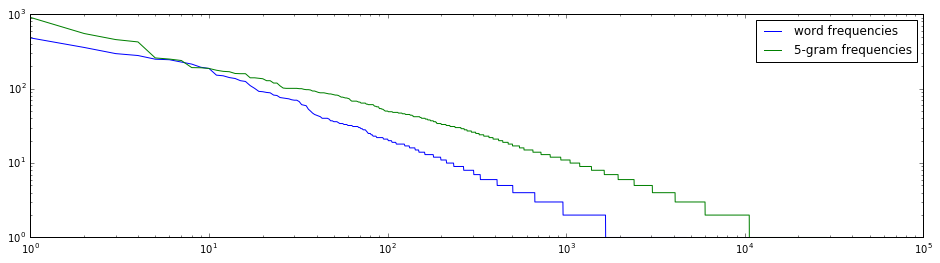

In [155]:
plt.figure(figsize=(16, 4))
plt.plot(range(len(word_freqs)), word_freqs.loc[:, 1], label='word frequencies')
plt.plot(range(len(ngram_freqs)), ngram_freqs.loc[:, 1], label='5-gram frequencies')
plt.yscale('log')
plt.xscale('log')

plt.legend()
plt.show()

In [9]:
from sklearn.decomposition import PCA

def pca_stats(word_vectors, words):
    pca = PCA(n_components=100)
    transformed = pca.fit_transform(word_vectors)
    ev2 = sum(pca.explained_variance_ratio_[:2])
    ev100 = sum(pca.explained_variance_ratio_)

    print('Explained variance ratio in   2 components', ev2)
    print('Explained variance ratio in 100 components', ev100)
    print('5 most important words in first 5 components:')
    for comp in pca.components_[:5]:
        print([x[1] for x in sorted(zip(np.abs(comp), words), reverse=True)[:5]])

def pca_plot(word_vectors):
    pca = PCA(n_components=2)
    transformed = pca.fit_transform(word_vectors)
    
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111)

    plt.scatter(transformed[:, 0], transformed[:, 1], c=cat_ints)

    # labels = [label if np.random.rand() > 0.997 else '' for label in data['summary']]
    # utils.label_points(ax, transformed[:, 0], transformed[:, 1], labels)
    utils.category_legend(category_to_int)

# Trial 1: PCA on all words

In [10]:
word_vectors = utils.summaries_to_vectors(summaries, word_freqs.loc[:, 0])
print(word_vectors)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]]


In [11]:
pca_stats(word_vectors, word_freqs.loc[:, 0])

Explained variance ratio in   2 components 0.079192669504
Explained variance ratio in 100 components 0.471287096535
5 most important words in first 5 components:
['spanok', 'a', 's', 'obed', 'o']
['a', 's', 'spanok', 'obed', 'vecera']
['s', 'ksp', 'a', 'obed', 'o']
['s', 'a', 'o', 'ranajky', 'cvicenie']
['o', 'ranajky', 'cvicenie', 'sprcha', 'ksp']


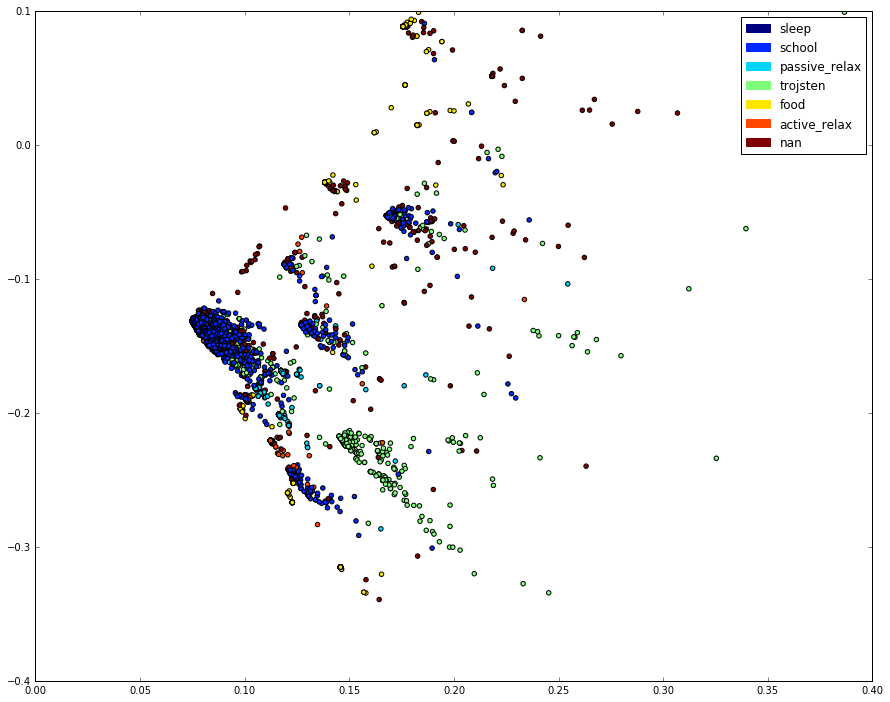

In [12]:
pca_plot(word_vectors)
plt.xlim([0, 0.4])
plt.ylim([-0.4, 0.1])
plt.show()

# Trial 2: PCA on TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
word_vectors = tfidf.fit_transform(summaries).toarray()
pca_stats(word_vectors, word_freqs.loc[:, 0])

Explained variance in   2 components 0.163939417418
Explained variance in 100 components 0.46181012609
5 Most important words in first 5 components:
[(0.9951330609094976, '2012'), (0.052016020676292865, 'generics'), (0.042561625149602607, 'poznamky'), (0.029036014049583329, 'poets'), (0.022327279256879606, 'selektory')]
[(0.97620901415542338, 'generics'), (0.19087370044688401, 'poznamky'), (0.05998305785256295, 'poets'), (0.036385829681928994, '2012'), (0.030053989920427574, 'sc')]
[(0.96357270684670837, 'poznamky'), (0.18543097688803023, 'generics'), (0.10868028163853737, 'poets'), (0.06698065750037098, 'navrhove'), (0.066844017488646004, 'kompaktonsti')]
[(0.58631145616939362, 'navrhove'), (0.56859547534369559, 'kompaktonsti'), (0.54171896933273078, 'pretestovavanie'), (0.10712465012619264, 'poznamky'), (0.1016062673566123, 'poets')]
[(0.96890309385002771, 'poets'), (0.14915841860887799, 'sc'), (0.10667615777233427, 'poznamky'), (0.07097213742910867, 'selektory'), (0.0590453947175969

# Trial 3: Remove some stop-words

In [13]:
words = word_freqs.loc[:, 0]
print([w for w in words if len(w) == 1])
print([w for w in words if len(w) == 2])

['a', 's', 'o', 'v', 'u', 'd', 'z', '1', '2', '5', '3', '7', '6', '4', 'k', 't', 'm', 'n', '8', 'c', 'p', 'f', 'i', 'r', 'b', '9', 'q', 'l', 'y', 'j', 'w', 'h', 'e', '0', 'g', 'x']
['na', 'do', 'so', 'rp', 't2', 'fb', 'tg', 'aj', 'xp', 'of', 'os', 'sa', 'ps', 'pp', 'zo', 'ls', 'co', '20', 'po', '60', 'sm', 'nn', 'jc', 'pr', 'je', 'in', 'ba', 'to', 'f2', 'du', 'fs', 'ii', 'vs', 'pc', 'si', 'f1', 'io', 'vo', 'we', 'el', 'np', '10', 'it', 'me', '21', 'kv', 'od', 'kk', '23', 'mr', 'tb', '12', '11', 't1', 't4', 'is', 'on', 'ma', 'gf', '16', 'ml', '17', '28', 'sk', '32', '13', '25', 'ch', 'cv', 'up', 'ts', '27', '00', 'bc', 'aa', 'iv', '50', '26', 'te', 'ta', '41', 'no', 'al', 'at', 'h6', 'fm', '15', 'mp', 'ia', 'or', 'lx', 'ms', 'em', 'lr', 'su', 'ci', '45', 'fp', 'bb', 'fw', '14', 'ip', '43', 'h3', 't3', '42', '55', 'la', 'fx', 'mi', 'my', 'le', 'yi', '24', 'za', 'by', 'fc', 'be', '30', '1b', '31', '70', '22', '48', 'xi', '33', '40', 'uc', 'bw', 'i9', 'ef', 'qq', 'ss', '51', 'f0', 'ty', '6

In [14]:
# Remove all 1-2 char. words, remove all words with less than 3 occurences.
words = [w for w, c in zip(word_freqs.loc[:, 0], word_freqs.loc[:, 1]) if len(w) > 2 and c > 2]
stop_words = [w for w, c in zip(word_freqs.loc[:, 0], word_freqs.loc[:, 1]) if not (len(w) > 2 and c > 2)]

In [16]:
word_vectors = utils.summaries_to_vectors(summaries, words)
pca_stats(word_vectors, words)
print(len(words))

Explained variance ratio in   2 components 0.116129541457
Explained variance ratio in 100 components 0.597831949246
5 most important words in first 5 components:
['spanok', 'ksp', 'obed', 'gitara', '9gag']
['ranajky', 'sprcha', 'cvicenie', 'ksp', 'proofread']
['ksp', 'ranajky', 'cvicenie', 'sprcha', 'obed']
['gitara', 'obed', '9gag', 'ksp', 'film']
['gitara', 'film', 'obed', 'the', 'ksp']
855


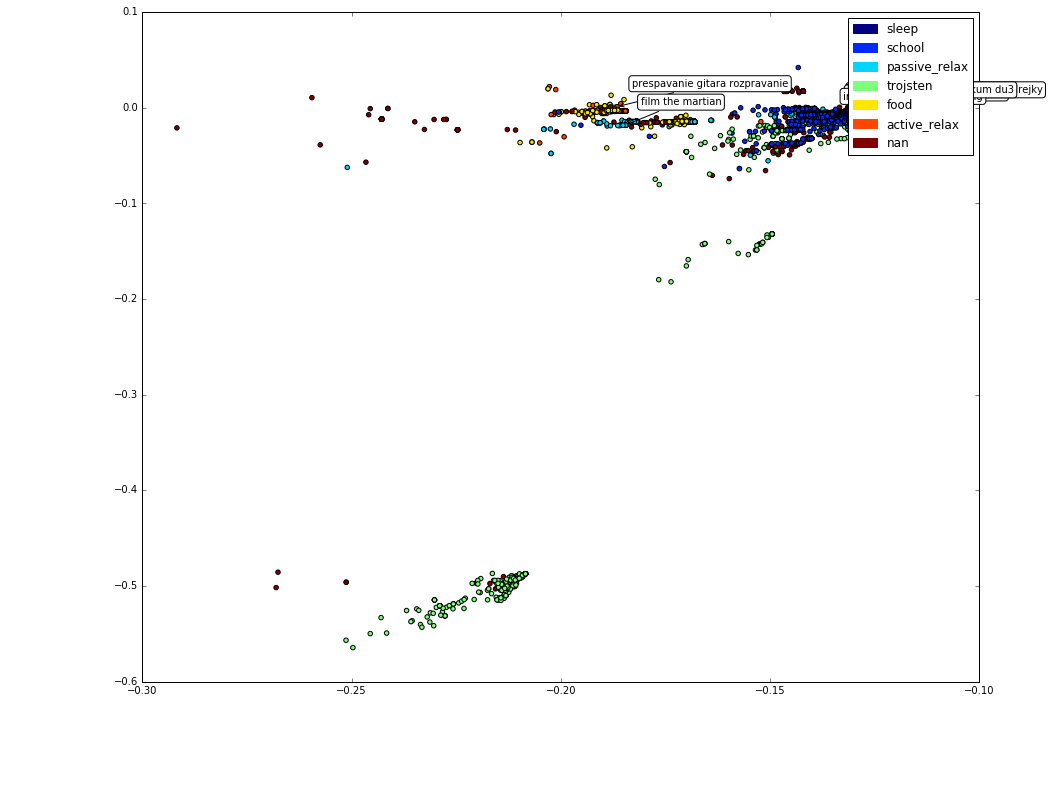

In [25]:
pca_plot(word_vectors)
plt.xlim([-0.3, -0.1])
plt.ylim([-0.6, 0.1])

plt.show()

# Trial 4: Use slovak stemmer
Thanks to mr. Shu https://github.com/mrshu/stemm-sk

In [17]:
stemmed_summaries = utils.stem_summaries(summaries)
word_freqs = pd.DataFrame(utils.count_word_frequencies(stemmed_summaries))
words = [w for w, c in zip(word_freqs.loc[:, 0], word_freqs.loc[:, 1]) if len(w) > 2 and c > 2]
word_vectors = utils.summaries_to_vectors(summaries, words)

In [18]:
pca_stats(word_vectors, words)

Explained variance ratio in   2 components 0.234588594894
Explained variance ratio in 100 components 0.808329433367
5 most important words in first 5 components:
['spanok', 'ksp', 'obed', '9gag', 'film']
['ksp', 'proofread', 'obed', '9gag', 'film']
['obed', '9gag', 'film', 'ksp', 'the']
['9gag', 'obed', 'film', 'the', 'ksp']
['film', '9gag', 'the', 'ksp', 'obed']


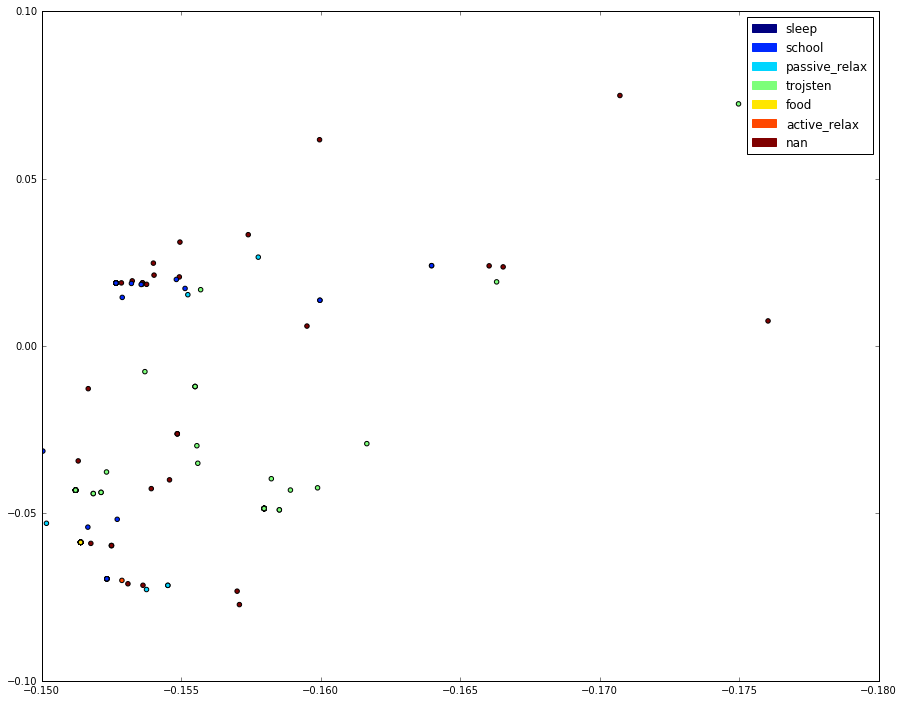

In [21]:
pca_plot(word_vectors)
plt.xlim([-0.15, -0.18])
plt.ylim([-0.1, 0.1])
plt.show()

# Select word vector dimension

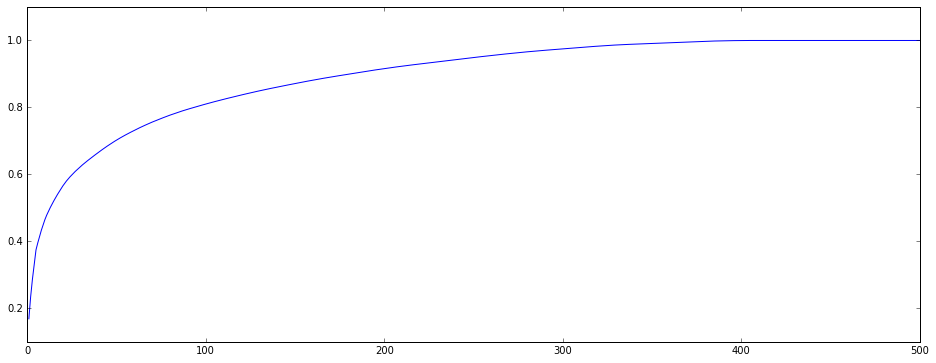

In [42]:
pca = PCA(n_components=500)
pca.fit(word_vectors)
plt.figure(figsize=(16, 6))
plt.plot(range(1, 501), np.cumsum(pca.explained_variance_ratio_))
plt.show()

# Classification only based on word vectors...

In [157]:
pca = PCA(n_components=100)
X = pca.fit_transform(word_vectors)
X = X[cat_ints != 6, :]
print(X.shape)
y = cat_ints[cat_ints != 6]

(4242, 100)


In [158]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=0)
splits = list(kf.split(X))

Training accuracy: 0.818010198473 +/- 0.00204487397224
Testing accuracy: 0.808105540369 +/- 0.0100039818688

Training macro-F1: 0.760382788567 +/- 0.00174199160043
Testing macro-F1: 0.74877777137 +/- 0.0090332237157
Normalized confusion matrix


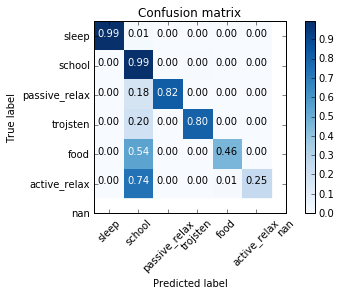

In [66]:
svc = svm.SVC(C=1, gamma=1, kernel='rbf')
utils.evaluate_model(svc, X, y, splits)

svc.fit(X, y)
cm = confusion_matrix(y, svc.predict(X))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

Training accuracy: 0.815652715624 +/- 0.00358234269218
Testing accuracy: 0.804572804854 +/- 0.00770215498673

Training macro-F1: 0.75500346829 +/- 0.0035270998817
Testing macro-F1: 0.743002765927 +/- 0.0100216380783
Normalized confusion matrix


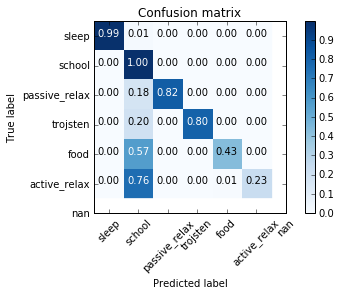

In [72]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=8)
utils.evaluate_model(rfc, X, y, splits)

rfc.fit(X, y)
cm = confusion_matrix(y, rfc.predict(X))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

Training accuracy: 0.831388447323 +/- 0.00164450556619
Testing accuracy: 0.81234915661 +/- 0.0105909557212

Training macro-F1: 0.776080806484 +/- 0.00195694775745
Testing macro-F1: 0.753327067387 +/- 0.00915220549606
Normalized confusion matrix


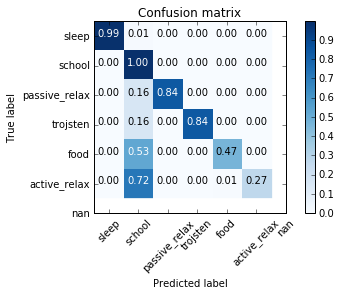

In [74]:
abc = AdaBoostClassifier(base_estimator=rfc, n_estimators=5)
utils.evaluate_model(abc, X, y, splits)
abc.fit(X, y)
cm = confusion_matrix(y, abc.predict(X))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

Training accuracy: 0.823255372903 +/- 0.00236562067858
Testing accuracy: 0.811878291886 +/- 0.00908785711887

Training macro-F1: 0.767026793986 +/- 0.00163674941594
Testing macro-F1: 0.752355014293 +/- 0.00896113369478
Normalized confusion matrix


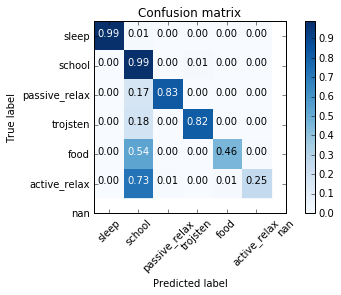

In [165]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), 
                    activation='relu', 
                    solver='adam', 
                    alpha=0.0001, 
                    max_iter=200, 
                    shuffle=True)

utils.evaluate_model(mlp, X, y, splits)

cm = confusion_matrix(y, mlp.predict(X))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

# Classification based on word vectors and metadata

In [166]:
pca = PCA(n_components=100)
word_v = pca.fit_transform(word_vectors)
metadata = X = data.iloc[:, [2, 3, 4, 5]].as_matrix()
# metadata = utils.normalize(metadata)
X = np.hstack([metadata, word_v])
X = utils.normalize(X)

X = X[cat_ints != 6, :]
y = cat_ints[cat_ints != 6]
print(X.shape)

(4242, 104)


In [87]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=0)
splits = list(kf.split(X))

Training accuracy: 0.860442961965 +/- 0.00239705781623
Testing accuracy: 0.802211258528 +/- 0.0123303571497

Training macro-F1: 0.818625665874 +/- 0.00305693195959
Testing macro-F1: 0.756142300901 +/- 0.0108133900207
Normalized confusion matrix


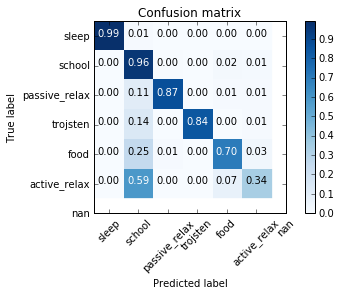

In [95]:
svc = svm.SVC(C=10, gamma=0.1, kernel='rbf')
utils.evaluate_model(svc, X, y, splits)

svc.fit(X, y)
cm = confusion_matrix(y, svc.predict(X))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

Training accuracy: 0.833981588146 +/- 0.00262114068529
Testing accuracy: 0.81800647821 +/- 0.0138088194389

Training macro-F1: 0.781908681255 +/- 0.00558718933497
Testing macro-F1: 0.761353963657 +/- 0.0142980388643
Normalized confusion matrix


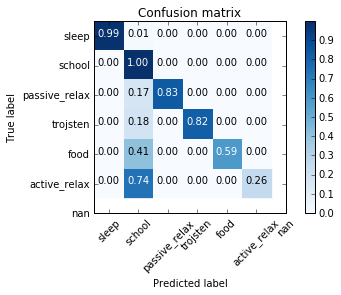

In [97]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
utils.evaluate_model(rfc, X, y, splits)

rfc.fit(X, y)
cm = confusion_matrix(y, rfc.predict(X))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

Training accuracy: 0.868146958383 +/- 0.0042976892491
Testing accuracy: 0.825323214528 +/- 0.0221763952903

Training macro-F1: 0.856556079954 +/- 0.00462906691509
Testing macro-F1: 0.811416881244 +/- 0.0199379223788
Normalized confusion matrix


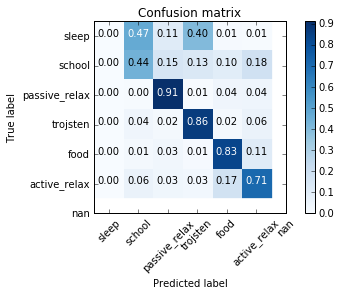

In [194]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), 
                    activation='relu', 
                    solver='adam', 
                    # early_stopping=True,
                    alpha=0.0001, 
                    max_iter=300, 
                    shuffle=True)

utils.evaluate_model(mlp, X, y, splits)

cm = confusion_matrix(y, mlp.predict(X))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

# Subsample dataset

In [179]:
freq_dict = dict(utils.count_freqs(y))
survival_probs = np.array([400 / freq_dict[cat] for cat in y])
selected = np.random.rand(len(y)) < survival_probs

Xs = X[selected, :]
ys = y[selected]
print(Xs.shape)
print(ys.shape)
print(utils.count_freqs(ys))

(2353, 104)
(2353,)
[(0, 412), (1, 429), (2, 386), (3, 397), (4, 386), (5, 343)]


In [180]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
splits = list(kf.split(Xs))

Training accuracy: 0.810540416493 +/- 0.00401351182899
Testing accuracy: 0.743906412807 +/- 0.0226185840153

Training macro-F1: 0.820915369399 +/- 0.0038161387767
Testing macro-F1: 0.758712591602 +/- 0.0190842633923
Normalized confusion matrix


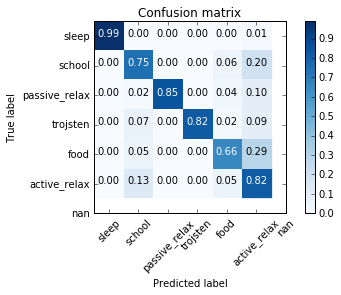

In [138]:
svc = svm.SVC(C=1, gamma=0.1, kernel='rbf')
utils.evaluate_model(svc, Xs, ys, splits)

svc.fit(Xs, ys)
cm = confusion_matrix(ys, svc.predict(Xs))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

Training accuracy: 0.826654771266 +/- 0.00412314093931
Testing accuracy: 0.784847020934 +/- 0.0177786118411

Training macro-F1: 0.837030208052 +/- 0.00345932116397
Testing macro-F1: 0.797744810974 +/- 0.0161276382775
Normalized confusion matrix


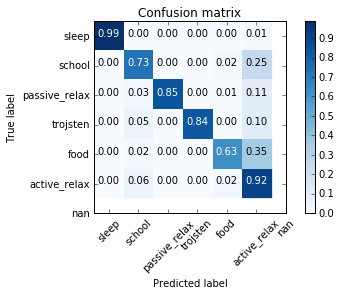

In [139]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
utils.evaluate_model(rfc, Xs, ys, splits)

rfc.fit(Xs, ys)
cm = confusion_matrix(ys, rfc.predict(Xs))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

Training accuracy: 0.842328727927 +/- 0.00386052712413
Testing accuracy: 0.785385553598 +/- 0.019079077394

Training macro-F1: 0.842679836091 +/- 0.00405624450338
Testing macro-F1: 0.786096788091 +/- 0.0211782729415
Normalized confusion matrix


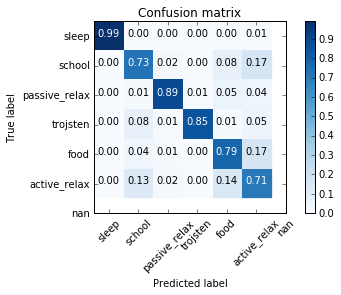

In [202]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 20), 
                    activation='relu', 
                    solver='adam', 
                    alpha=0.0001, 
                    max_iter=300, 
                    shuffle=True)

utils.evaluate_model(mlp, Xs, ys, splits)

cm = confusion_matrix(ys, mlp.predict(Xs))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

# Categorization of unlabeled data

In [204]:
pca = PCA(n_components=100)
word_v = pca.fit_transform(word_vectors)
metadata = X = data.iloc[:, [2, 3, 4, 5]].as_matrix()
# metadata = utils.normalize(metadata)
X = np.hstack([metadata, word_v])
X = utils.normalize(X)

int_to_category = {v:k for k,v in category_to_int.items()}

In [205]:
labs_svm = svc.predict(X)
labs_svm = np.array([int_to_category[lab] for lab in labs_svm])

labs_rfc = rfc.predict(X)
labs_rfc = np.array([int_to_category[lab] for lab in labs_rfc])

labs_mlp = mlp.predict(X)
labs_mlp = np.array([int_to_category[lab] for lab in labs_mlp])

pd.set_option('display.width', 1000)
newLabeled = pd.DataFrame()
newLabeled['summaries'] = summaries[cat_ints == 6]
newLabeled['categories SVM'] = labs_svm[cat_ints == 6]
newLabeled['categories RF'] = labs_rfc[cat_ints == 6]
newLabeled['categories MLP'] = labs_mlp[cat_ints == 6]


print(newLabeled)

                                            summaries categories SVM  categories RF categories MLP
0                     zapis stipendium diplomy na gjh         school       trojsten          sleep
1                           prve 2 kapitoly z algebry         school         school         school
2                                      gjh ocenovanie       trojsten       trojsten       trojsten
3                           trojstenovy pondeok kvizy         school         school         school
4                                       d u programko         school         school         school
5                                                riad           food           food   active_relax
6                                      55 vyrocie gjh       trojsten       trojsten       trojsten
7                                           vysavanie         school         school         school
8                                            aj uloha         school         school         school
9         